In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Vibration in a one-dimensional system

질량이 $m$인 $N$개의 동일한 물체가 일렬로 동일한 용수철에 매달려 있다. $i$번째 물체의 운동방정식은 다음처럼 주어진다.
$$m \frac{d^2 x_i}{dt^2} = k(x_{i+1}-x_{i}) - k(x_i-x_{i-1})$$
한쪽 끝에서 연결된 용수철에 주기적인 힘($F$)을 가하고 있다. 그러면 양 끝단에 물체에 운동방정식은 다음과 같다.
$$m \frac{d^2 x_1}{dt^2} = k(x_{2}-x_{1}) + F \\
m \frac{d^2 x_N}{dt^2} = -k(x_{N}-x_{N-1})$$
만약 주기적인 힘이 $F=C e^{i wt}$로 주어지면 $x$는 다음의 $x_i(t)=a_i e^{iwt}$해를 가진다. 정리하면 다음과 같은 방정식을 얻을 수 있다.
$$(d -k)a_1 -k a_2 = C, \\
d a_i - k a_{i-1}- k a_{i+1} = 0, \\
(d - k)a_N - k x_{N-1} =0$$
여기에서 $d=2k-mw^2$이다.

위의 운동방정식을 행렬로 표현하면 다음과 같다.
$$Ma=b $$$$
M=
\begin{pmatrix}
d-k &amp; -k &amp; 0 &amp; 0 &amp; 0 &amp; \cdots \\
-k &amp; d &amp; -k &amp; 0 &amp; 0 &amp; \cdots \\
0 &amp; -k &amp; d &amp; -k &amp; 0 &amp; \cdots \\
\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp; \cdots  \\
0 &amp; 0 &amp; 0&amp; 0&amp; -k &amp; d-k 
\end{pmatrix}, \quad
a=
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
a_3 \\ 
\cdots \\ 
a_N  
\end{pmatrix}, \quad
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
0 
\end{pmatrix}
$$

$m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.

$w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.

이를 그래프로 표현하고 의미를 설명하세요.x축이 i (1~N), y축이 $a_i$

40X40 행렬을 직접 입력하는 것을 금지하지는 않지만 그렇게 하지 않기를 바랍니다.
np.zeros(n) 함수는 크기가 n이며 모든 성분이 0인 배열을 만드는 명령어입니다.

In [6]:
# 𝑚=1 , 𝑘=1, 𝐶=1, 𝑁=40 일 때, d = 2-w**2 이다.
# w=1 인 경우, d = 1
M0=np.eye(40)
M1=1*M0

for n in range(0, 40, 1):
    M1[n,n-1]=-1
    M1[n-1,n]=-1

M1[0,0]=1
M1[39,39]=1
M1[39,0]=0
M1[0,39]=0
M1

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  1., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [7]:
# w=2 인 경우, d = -2
M0=np.eye(40)
M2=-2*M0

for n in range(0, 40, 1):
    M2[n,n-1]=-1
    M2[n-1,n]=-1

M2[0,0]=-3
M2[39,39]=-3
M2[39,0]=0
M2[0,39]=0
M2

array([[-3., -1., -0., ..., -0., -0.,  0.],
       [-1., -2., -1., ..., -0., -0., -0.],
       [-0., -1., -2., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -2., -1., -0.],
       [-0., -0., -0., ..., -1., -2., -1.],
       [ 0., -0., -0., ..., -0., -1., -3.]])

In [8]:
# w=3 인 경우, d = -7
M0=np.eye(40)
M3=-7*M0

for n in range(0, 40, 1):
    M3[n,n-1]=-1
    M3[n-1,n]=-1

M3[0,0]=-8
M3[39,39]=-8
M3[39,0]=0
M3[0,39]=0
M3

array([[-8., -1., -0., ..., -0., -0.,  0.],
       [-1., -7., -1., ..., -0., -0., -0.],
       [-0., -1., -7., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -7., -1., -0.],
       [-0., -0., -0., ..., -1., -7., -1.],
       [ 0., -0., -0., ..., -0., -1., -8.]])

In [9]:
b1=np.zeros(40)
b1[0]=1 # C=1 이라고 주어짐.
b1

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [10]:
# 위에 제시한 각 w에 대하여
a1=np.linalg.solve(np.linalg.inv(M1),b1)
a2=np.linalg.solve(np.linalg.inv(M2),b1)
a3=np.linalg.solve(np.linalg.inv(M3),b1)

a1, a2, a3

(array([ 1., -1., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,
        -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,
        -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
         0.]),
 array([-3.00000000e+00, -1.00000000e+00,  2.81069120e-18, -2.81069120e-18,
         3.20303335e-31,  6.62734152e-31,  2.16423223e-16, -7.40999495e-32,
        -8.36252790e-31,  3.24634834e-16,  1.08211611e-16,  1.81755094e-33,
         3.24634834e-16,  2.19233914e-16, -1.08211611e-16, -2.16423223e-16,
        -2.19233914e-16,  1.70126564e-30,  1.08211611e-16,  5.55111512e-17,
        -5.41058056e-17, -1.11022302e-16,  5.41058056e-17, -5.41058056e-17,
        -2.17828568e-16, -1.08211611e-16,  1.09616957e-16,  1.08211611e-16,
         5.27004600e-17,  5.34031328e-17,  1.06129030e-30,  2.63502300e-17,
         5.48084784e-17,  7.02672800e-19, -5.41058056e-17, -4.05793542e-17,
        -1.35264514e-17,  1.40534560e-17,  1.51294237e-17,  4.98458518e-18]),
 arr

Text(0, 0.5, 'a')

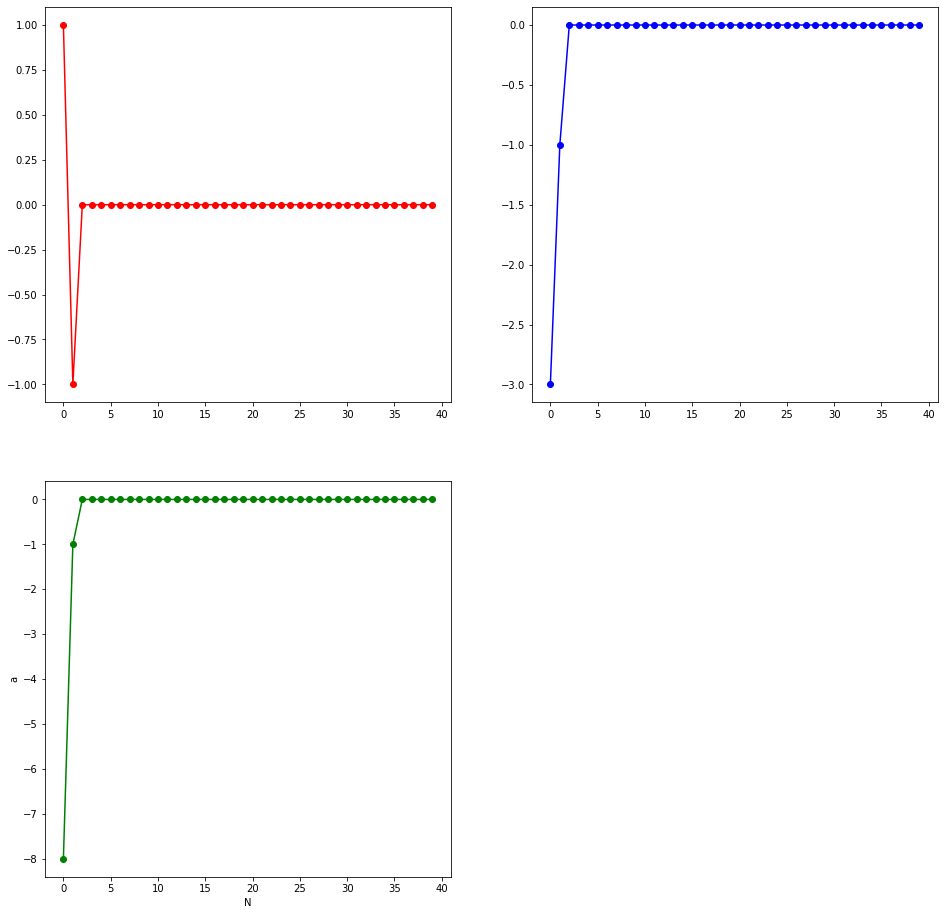

In [12]:
xdata=np.arange(0,40,1)
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.plot(xdata, a1,'-o', color='r')
plt.subplot(222)
plt.plot(xdata, a2,'-o', color='b')
plt.subplot(223)
plt.plot(xdata, a3,'-o', color='g')
plt.xlabel("N")
plt.ylabel("a")

한 쪽에서 힘을 가하게 되면, 힘을 가한 반대방향으로 갈 수록 진폭이 점점 줄어들어 0에 가까워짐을 확인할 수 있습니다.

# 2. 양쪽 끝에서 힘을 가하면 어떻게 되는가?


즉, b행렬이 다음과 같은 경우에 대해서 살펴보아라.$$
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
C 
\end{pmatrix}
$$

$m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.

$w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.

이를 그래프로 표현하고 의미를 설명하세요.

In [14]:
# 1, 에서 구한 M1, M2, M3 를 이용해보자. w=1, 2, 3
b2=np.zeros(40)
b2[0]=1
b2[39]=1
b2

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.])

In [15]:
a11=np.linalg.solve(np.linalg.inv(M1),b2)
a22=np.linalg.solve(np.linalg.inv(M2),b2)
a33=np.linalg.solve(np.linalg.inv(M3),b2)

a11, a22, a33

(array([ 1., -1., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,
        -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,
        -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -1.,
         1.]),
 array([-3.00000000e+00, -1.00000000e+00, -5.73615229e-18,  1.57313280e-17,
         5.61219694e-17,  6.48635734e-17,  2.91226413e-16,  6.07953858e-17,
         6.02472217e-17,  4.41472906e-16,  2.53210823e-16,  1.16865582e-17,
         2.31759056e-16,  1.86171833e-16, -6.83004851e-17, -3.02337520e-16,
        -3.34690904e-16, -5.55111512e-18,  1.02953821e-16, -2.91095061e-17,
        -2.22044605e-16, -3.45069318e-16, -4.08799978e-16, -6.83796454e-16,
        -4.40507845e-16,  2.48843092e-17,  5.13992141e-18, -3.33066907e-17,
         2.95053836e-16,  2.18079523e-16, -3.35988547e-17,  1.69798816e-16,
         2.40548322e-16,  6.83214169e-17, -3.28020439e-17, -5.55111512e-17,
        -7.13714802e-17, -3.99680289e-16, -1.00000000e+00, -3.00000000e+00]),
 arr

Text(0, 0.5, 'a')

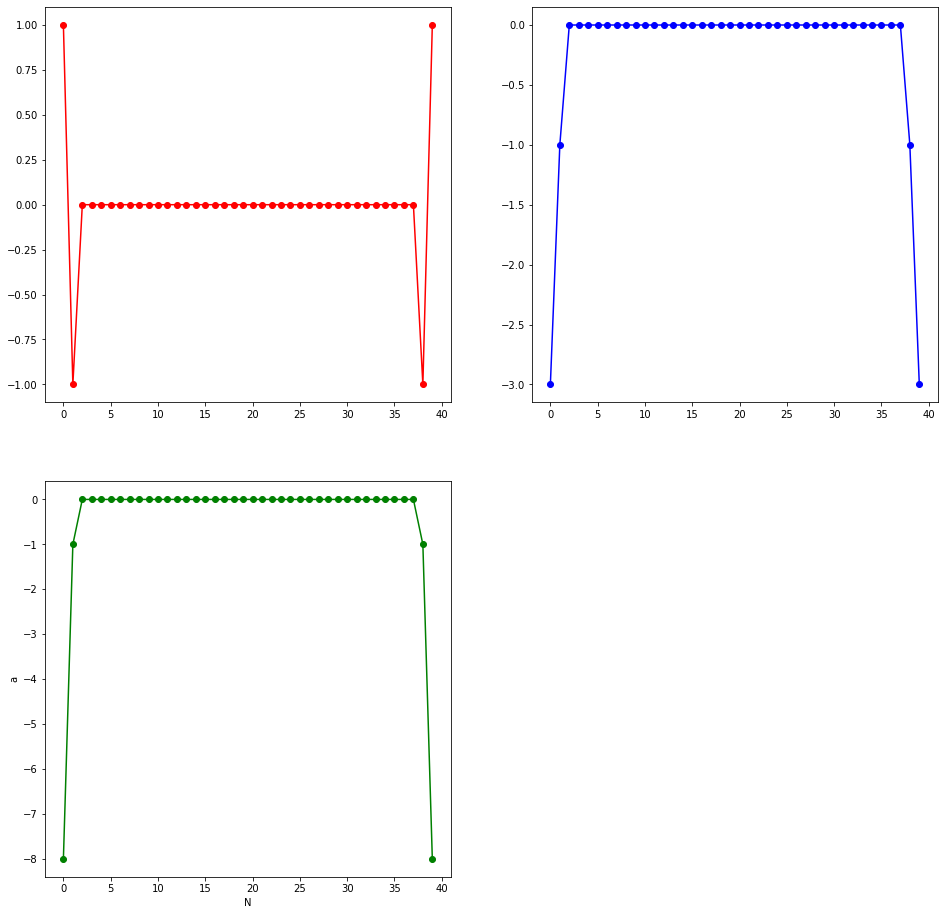

In [16]:
xdata=np.arange(0,40,1)
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.plot(xdata, a11,'-o', color='r')
plt.subplot(222)
plt.plot(xdata, a22,'-o', color='b')
plt.subplot(223)
plt.plot(xdata, a33,'-o', color='g')
plt.xlabel("N")
plt.ylabel("a")

양 쪽에서 힘을 가하면, 1에서와 같은 개념으로 힘을 가한 반대방향으로 갈 수록 진폭이 감소하다가 0이 됨을 확인할 수 있으며, 이 상황에선 양쪽에서 힘을 가했기 때문에 가운데 지점을 향할수록 0으로 수렴함을 확인할 수 있습니다.